# 1) 데이터 읽기

In [15]:
import pandas as pd

df = pd.read_csv('./abalone.csv')

df = df.drop('id', axis = 1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2) 결측치 확인

In [16]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'How old is Abalone')

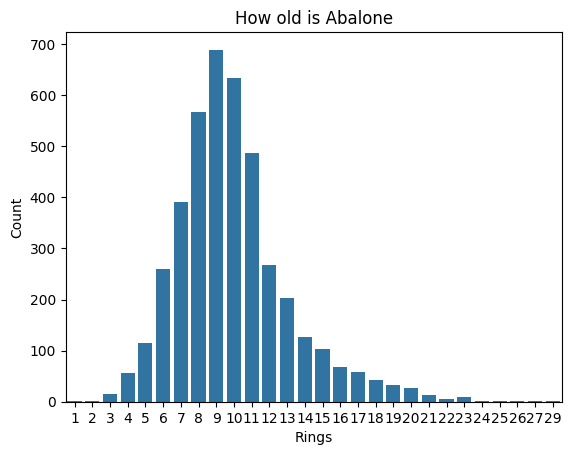

In [17]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old is Abalone")

In [19]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

value_count 갯수가 100개 미만인 행은 Outliar로 취급하고 삭제한다.

In [27]:
# 각 값의 개수를 계산
value_counts = df['Rings'].value_counts()

# 100개 이상인 값 필터링
to_keep = value_counts[value_counts >= 100].index

# 원본 DataFrame에서 해당 값을 가진 행만 남김
df = df[df['Rings'].isin(to_keep)]

Text(0.5, 1.0, 'How old is Abalone')

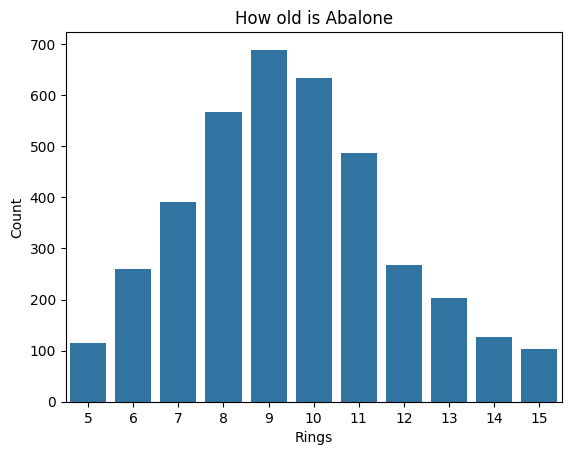

In [28]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old is Abalone")

5~15 사이의 Rings를 가진 Abalone만 남게 되었다.

# 5) X, Y 나누기

In [32]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64


Sex Column을 One-Hot Encoding 해준다.

In [35]:
X = pd.get_dummies(X, columns=['Sex'])

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,True,False,False


# 6) 데이터 스케일링

In [36]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.614302,-0.459694,-1.093299,-0.637889,-0.613253,-0.727033,-0.636132,-0.667826,-0.695680,1.317751
1,-1.535413,-1.521813,-1.217743,-1.242812,-1.178809,-1.214092,-1.252816,-0.667826,-0.695680,1.317751
2,0.043634,0.124471,-0.097754,-0.296112,-0.468470,-0.351302,-0.173620,1.497396,-0.695680,-0.758869
3,-0.745890,-0.459694,-0.346640,-0.633695,-0.653973,-0.606428,-0.597590,-0.667826,-0.695680,1.317751
4,-1.710863,-1.628025,-1.466629,-1.285796,-1.224054,-1.297588,-1.368444,-0.667826,1.437443,-0.758869
...,...,...,...,...,...,...,...,...,...,...
4172,0.350671,0.443107,0.648906,0.144213,0.045055,0.553237,0.127013,1.497396,-0.695680,-0.758869
4173,0.569983,0.336895,-0.097754,0.309859,0.357242,0.325942,0.215662,-0.667826,-0.695680,1.317751
4174,0.657708,0.708637,1.644451,0.750185,0.748607,1.003187,0.581817,-0.667826,-0.695680,1.317751
4175,0.877020,0.814849,0.275576,0.579297,0.773492,0.757338,0.489315,1.497396,-0.695680,-0.758869


# 7) One-Hot 인코딩

In [37]:
Y = pd.get_dummies(Y).values

Y

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# 8) Train데이터, Test데이터 나누기

In [38]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 9) 딥러닝 모델 정의

In [ ]:
X_train.shape[0]

614

## 1. 함수형으로 변환

In [39]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(10, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(11, activation = "softmax")(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635 (2.48 KB)

 Trainable params: 635 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

# 10) 학습, 예측

In [40]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2237 - loss: 2.0674 - val_accuracy: 0.2679 - val_loss: 1.8644
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2557 - loss: 1.8804 - val_accuracy: 0.2770 - val_loss: 1.8610
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2678 - loss: 1.8280 - val_accuracy: 0.2510 - val_loss: 2.0106
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 1.8518 - val_accuracy: 0.3108 - val_loss: 1.8228
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.7742 - val_accuracy: 0.2081 - val_loss: 2.0400
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2005 - loss: 2.0425 - val_accuracy: 0.2354 - val_loss: 2.0009
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.9192 - val_accuracy: 0.2796 - val_loss: 1.8774
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2559 - loss: 1.8552 - val_accuracy: 0.2614 - val_loss:

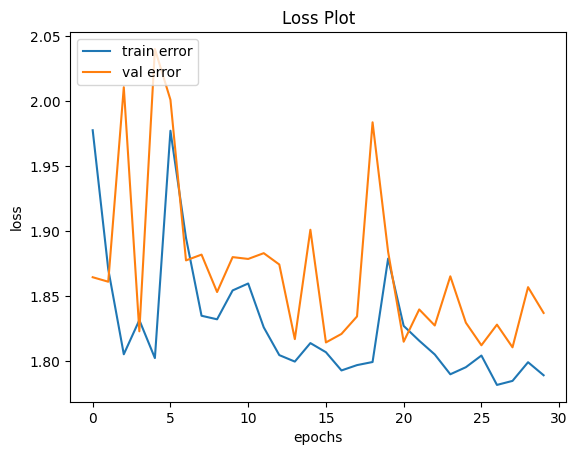

In [41]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [42]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

ValueError: inconsistent shapes

## 2. 드롭아웃 사용해서 성능비교 해 볼 것

In [53]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

inputs = Input(shape =(10, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer0 = Dropout(0.5)(layer0)
layer1 = Dense(32, activation = "relu")(layer0)
layer1 = Dropout(0.5)(layer1)
prediction = Dense(11, activation = "softmax")(layer1)

model2 = Model(inputs = inputs, outputs = prediction)

model2.compile(Adam(learning_rate = 0.01), 'categorical_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083 (4.23 KB)

 Trainable params: 1,083 (4.23 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
import numpy as np

model_history=model2.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1809 - loss: 2.2969 - val_accuracy: 0.2666 - val_loss: 1.9648
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2261 - loss: 2.0214 - val_accuracy: 0.2744 - val_loss: 1.8945
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2489 - loss: 1.9908 - val_accuracy: 0.2510 - val_loss: 1.8871
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2688 - loss: 1.9274 - val_accuracy: 0.2692 - val_loss: 1.8595
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2627 - loss: 1.9374 - val_accuracy: 0.2861 - val_loss: 1.8579
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2571 - loss: 1.9594 - val_accuracy: 0.2601 - val_loss: 1.8556
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2609 - loss: 1.9200 - val_accuracy: 0.2926 - val_loss: 1.8469
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2620 - loss: 1.9243 - val_accuracy: 0.2562 - val_loss:

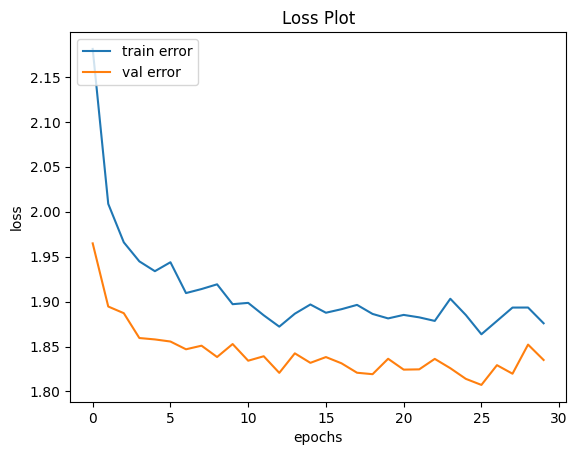

In [55]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()